## Colin's active development sandbox

In [12]:
from enum import Enum
from pathlib import Path
import logging
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import math
from concurrent.futures import ProcessPoolExecutor, as_completed
from DataPreProcessing import DataPreProcessing, DataPaths

### Tracklet iterator

[2025-02-26 20:06:42] - [INFO]: DataPreProcessing initialized.
[2025-02-26 20:06:42] - [INFO]: ROOT_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted
[2025-02-26 20:06:42] - [INFO]: TRAIN_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\train\images
[2025-02-26 20:06:42] - [INFO]: TEST_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\test\images
[2025-02-26 20:06:42] - [INFO]: VAL_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\challenge\images
[2025-02-26 20:06:42] - [INFO]: Using device: cuda
[2025-02-26 20:06:42] - [INFO]: ['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005']
[2025-02-26 20:06:42] - [INFO]: Min tracklet: 0
[2025-02-26 20:06:42] - [INFO]: Max tracklet: 1426


Processing tracks:   0%|          | 0/1 [00:00<?, ?it/s]

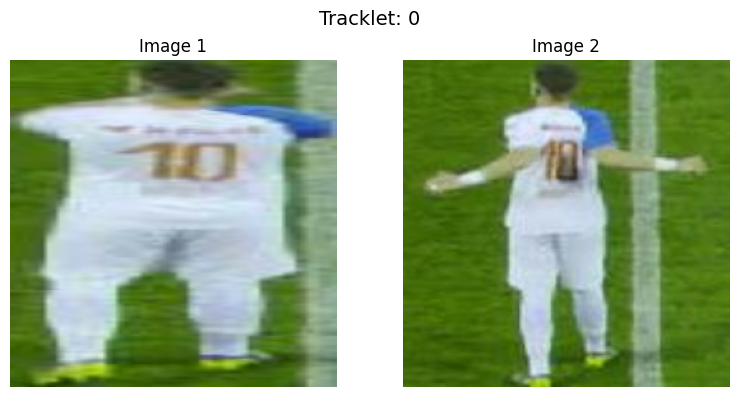

In [13]:
input_folder = DataPaths.TRAIN_DATA_DIR.value

NUM_TRACKLETS = 1
NUM_IMGS_PER_TRACKLET = 2

# Instantiate the pre-processing class
data_pre = DataPreProcessing()

# Call generate_features with load_only=True to simply load the images as tensors
data_dict = data_pre.generate_features(input_folder, DataPaths.TEMP_EXPERIMENT_DIR.value, load_only=True, num_tracks=NUM_TRACKLETS)
selected_tracks = list(data_dict.keys())[:NUM_TRACKLETS]

for track in selected_tracks:
    track_tensor = data_dict[track][:NUM_IMGS_PER_TRACKLET]  # shape: (num_images, C, H, W)
    num_images = track_tensor.shape[0]
    num_cols = 2
    num_rows = math.ceil(num_images / num_cols)
    
    # Create a figure for this tracklet
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
    fig.suptitle(f"Tracklet: {track}", fontsize=14)
    
    # In case there is only one row/column, force axs to be iterable
    if num_rows == 1 and num_cols == 1:
        axs = [axs]
    elif num_rows == 1 or num_cols == 1:
        axs = list(axs)
    else:
        axs = axs.flatten()
    
    for idx in range(num_rows * num_cols):
        ax = axs[idx]
        if idx < num_images:
            # Convert tensor to numpy array (C, H, W) -> (H, W, C)
            img = track_tensor[idx].permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min() + 1e-6)
            ax.imshow(img)
            ax.set_title(f"Image {idx+1}")
            ax.axis("off")
        else:
            ax.axis("off")
    plt.tight_layout()
    plt.show()